In [1]:
from tensorflow.keras.models import load_model

In [2]:
model = load_model('D:/FCI/graduation project/smart city/Machine Learning/Road_Crack_Detection_Model_2000.h5')

In [3]:
import glob

In [5]:
lst_crack_img = glob.glob('D:/FCI/graduation project/smart city/Machine Learning/road crack dataset/crack images/*')

In [6]:
print('Number of images with cracks : {}'.format(len(lst_crack_img)))

Number of images with cracks : 6


In [7]:
lst_crack_img

['D:/FCI/graduation project/smart city/Machine Learning/road crack dataset/crack images\\140620_inv_infrastructure_1.jpg',
 'D:/FCI/graduation project/smart city/Machine Learning/road crack dataset/crack images\\crack 1.png',
 'D:/FCI/graduation project/smart city/Machine Learning/road crack dataset/crack images\\crack 2.png',
 'D:/FCI/graduation project/smart city/Machine Learning/road crack dataset/crack images\\crack 3.png',
 'D:/FCI/graduation project/smart city/Machine Learning/road crack dataset/crack images\\crack 4.png',
 'D:/FCI/graduation project/smart city/Machine Learning/road crack dataset/crack images\\P1000124.JPG']

In [8]:
import random

In [10]:
lst_crack = []
for x in lst_crack_img:
    lst_crack.append([x,1])

random.shuffle(lst_crack)

In [11]:
import pandas as pd

In [12]:
df = pd.DataFrame(lst_crack,columns = ['files','target'])
df

,files,target
0,D:/FCI/graduation project/smart city/Machine L...,1
1,D:/FCI/graduation project/smart city/Machine L...,1
2,D:/FCI/graduation project/smart city/Machine L...,1
3,D:/FCI/graduation project/smart city/Machine L...,1
4,D:/FCI/graduation project/smart city/Machine L...,1
5,D:/FCI/graduation project/smart city/Machine L...,1


In [13]:
import cv2

In [14]:
def preprocessing_image(filepath):
    img = cv2.imread(filepath) #read
    if img is None:
        print("Error: Could not load image")
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR) #convert
    img = cv2.resize(img,(227,227))  # resize
    img = img / 255 #scale
    return img

In [15]:
import numpy as np

In [16]:
def create_format_dataset(dataframe):
    X = []
    y = []
    i=0
    for f,t in dataframe.values:
        i+=1
        print(i)
        X.append(preprocessing_image(f))
        y.append(t)

    return np.array(X),np.array(y)

In [17]:
X, y = create_format_dataset(df)

1
2
3
4
5
6


In [18]:
y

array([1, 1, 1, 1, 1, 1])

In [19]:
print(X.shape)
print(y.shape)

(6, 227, 227, 3)
(6,)


In [20]:
y_pred = model.predict(X)

1/1 [==============================] - 0s 261ms/step


In [21]:
y_pred = y_pred > 0.5

In [22]:
y_pred

array([[False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False]])

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

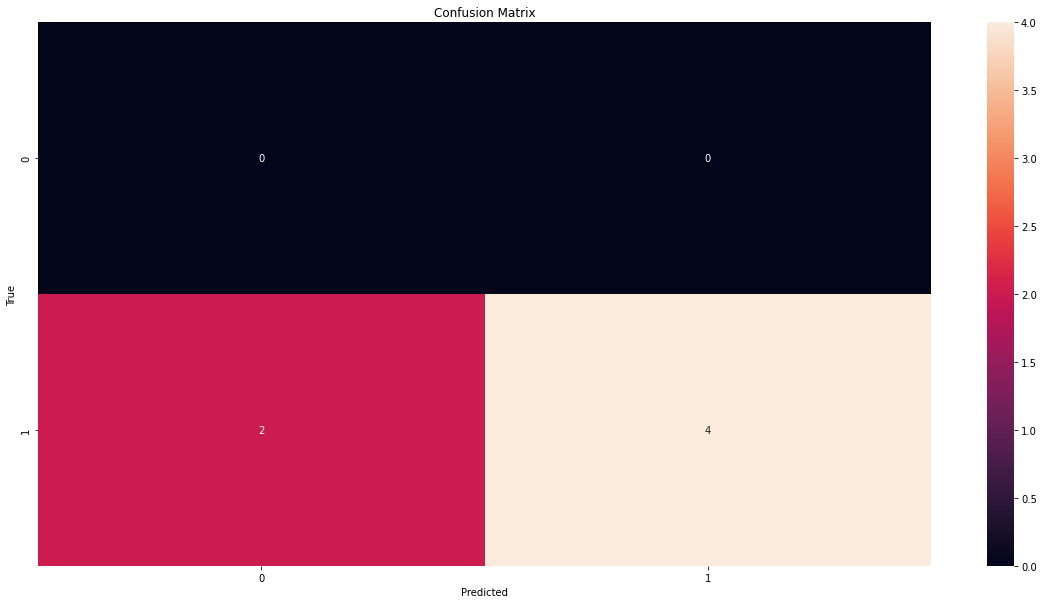

In [24]:
plt.figure(figsize = (20,10))

sns.heatmap(confusion_matrix(y,y_pred),annot = True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

In [25]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.67      0.80         6

    accuracy                           0.67         6
   macro avg       0.50      0.33      0.40         6
weighted avg       1.00      0.67      0.80         6



D:\python 3.10.6\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\python 3.10.6\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\python 3.10.6\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
